In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

# Dataset import

In [50]:

base_path = r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\\'

cic_ddos2019 = {
    'DNS-test': pd.read_parquet(base_path + 'DNS-testing.parquet', engine='fastparquet'),

    'LDAP-test': pd.read_parquet(base_path + 'LDAP-testing.parquet', engine='fastparquet'),
    'LDAP-train': pd.read_parquet(base_path + 'LDAP-training.parquet', engine='fastparquet'),
    
    'MSSQL-test': pd.read_parquet(base_path + 'MSSQL-testing.parquet', engine='fastparquet'),
    'MSSQL-train': pd.read_parquet(base_path + 'MSSQL-training.parquet', engine='fastparquet'),
    
    'NetBIOS-test': pd.read_parquet(base_path + 'NetBIOS-testing.parquet', engine='fastparquet'),
    'NetBIOS-train': pd.read_parquet(base_path + 'NetBIOS-training.parquet', engine='fastparquet'),
    
    'NTP-test': pd.read_parquet(base_path + 'NTP-testing.parquet', engine='fastparquet'),
    
    'Portmap-train': pd.read_parquet(base_path + 'Portmap-training.parquet', engine='fastparquet'),
    'SNMP-test': pd.read_parquet(base_path + 'SNMP-testing.parquet', engine='fastparquet'),
    
    'Syn-test': pd.read_parquet(base_path + 'Syn-testing.parquet', engine='fastparquet'),
    'Syn-train': pd.read_parquet(base_path + 'Syn-training.parquet', engine='fastparquet'),
    
    'TFTP-test': pd.read_parquet(base_path + 'TFTP-testing.parquet', engine='fastparquet'),
    
    'UDPLag-test': pd.read_parquet(base_path + 'UDPLag-testing.parquet', engine='fastparquet'),
    'UDPLag-train': pd.read_parquet(base_path + 'UDPLag-training.parquet', engine='fastparquet'),
    
    'UDP-test': pd.read_parquet(base_path + 'UDP-testing.parquet', engine='fastparquet'),
    'UDP-train': pd.read_parquet(base_path + 'UDP-training.parquet', engine='fastparquet'),
}

# merging between train sets and test sets for each attack type
cic_ddos2019_merged = {
    'DNS': cic_ddos2019['DNS-test'],
    'LDAP': pd.concat([cic_ddos2019['LDAP-train'], cic_ddos2019['LDAP-test']], ignore_index=True),
    'MSSQL': pd.concat([cic_ddos2019['MSSQL-train'], cic_ddos2019['MSSQL-test']], ignore_index=True),
    'NetBIOS': pd.concat([cic_ddos2019['NetBIOS-train'], cic_ddos2019['NetBIOS-test']], ignore_index=True),    
    'NTP': cic_ddos2019['NTP-test'],
    'Portmap': cic_ddos2019['Portmap-train'],
    'SNMP': cic_ddos2019['SNMP-test'],
    'Syn': pd.concat([cic_ddos2019['Syn-train'], cic_ddos2019['Syn-test']], ignore_index=True),
    'TFTP': cic_ddos2019['TFTP-test'],
    'UDPLag': pd.concat([cic_ddos2019['UDPLag-train'], cic_ddos2019['UDPLag-test']], ignore_index=True),
    'UDP': pd.concat([cic_ddos2019['UDP-train'], cic_ddos2019['UDP-test']], ignore_index=True),
}

# merging all attack types 
cic_ddos2019_all = pd.concat(cic_ddos2019_merged.values(), ignore_index=True)

- cic_ddos2019 : (dictionary) contaning the raw imported parts of the dataset
- cic_ddos2019_merged : (dictionary) simplified version where the dataset parts are merged between train and test for each attack type
- cic_ddos2019_all : (dataframe) the whole dataset merged between test/train and all the attack types

# Dataset Visualisation

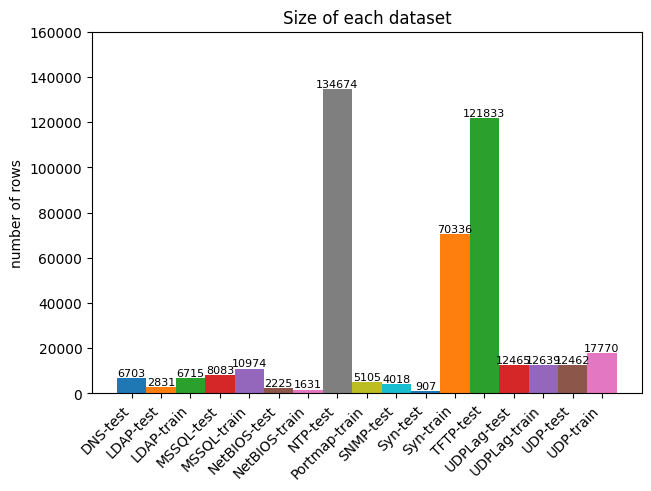

In [51]:
# checking the size of every dataset part

fig, ax = plt.subplots(layout='constrained')
positions = []
dataset_names = []
mult = 0
barWidth = 1

for dataset_name, dataset in cic_ddos2019.items():
    position = barWidth * mult
    dataset_names.append(dataset_name)
    positions.append(position)
    currentBar = ax.bar(position, dataset.shape[0], width=barWidth, label=dataset_name)
    ax.bar_label(currentBar, fontsize=8)
    mult += 1

ax.set_xticks(positions, dataset_names)
ax.set_xticklabels(dataset_names, rotation=45, ha='right')
ax.set_ybound(0,160000)
ax.set_title('Size of each dataset')
ax.set_ylabel('number of rows')

plt.show()

[0, 6715, 10974, 1631, 0, 5105, 0, 70336, 0, 12639, 17770]
[6703, 2831, 8083, 2225, 134674, 0, 4018, 907, 121833, 12465, 12462]


C:\Users\RACYM\AppData\Local\Temp\ipykernel_2120\4143570142.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dataset_names, rotation=45, ha='right')


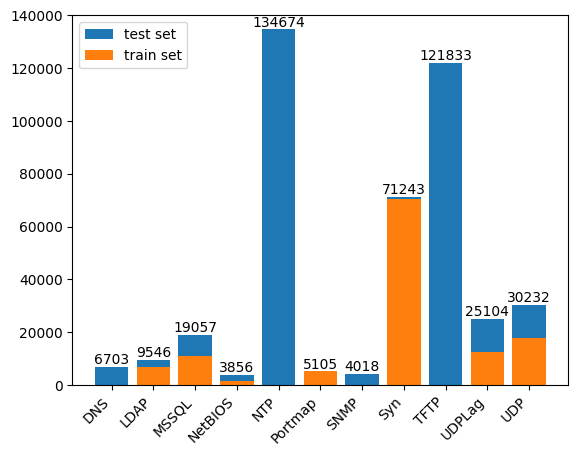

In [52]:
# stacked bars for each dataset train/test data and total

dataset_names = ['DNS', 'LDAP', 'MSSQL', 'NetBIOS', 'NTP','Portmap', 'SNMP', 'Syn', 'TFTP', 'UDPLag', 'UDP']

lenghts_train = [
    0,
    cic_ddos2019['LDAP-train'].shape[0],
    cic_ddos2019['MSSQL-train'].shape[0],
    cic_ddos2019['NetBIOS-train'].shape[0],
    0,
    cic_ddos2019['Portmap-train'].shape[0],
    0,
    cic_ddos2019['Syn-train'].shape[0],
    0,
    cic_ddos2019['UDPLag-train'].shape[0],
    cic_ddos2019['UDP-train'].shape[0]
]
lenghts_test = [
    cic_ddos2019['DNS-test'].shape[0],
    cic_ddos2019['LDAP-test'].shape[0],
    cic_ddos2019['MSSQL-test'].shape[0],
    cic_ddos2019['NetBIOS-test'].shape[0],
    cic_ddos2019['NTP-test'].shape[0],
    0,
    cic_ddos2019['SNMP-test'].shape[0],
    cic_ddos2019['Syn-test'].shape[0],
    cic_ddos2019['TFTP-test'].shape[0],
    cic_ddos2019['UDPLag-test'].shape[0],
    cic_ddos2019['UDP-test'].shape[0]
]
print(lenghts_train)
print(lenghts_test)
lenghts_total = [lenghts_test[i] + lenghts_train[i] for i in range(len(lenghts_test))]


fig, ax = plt.subplots()
topRect = ax.bar(dataset_names, lenghts_test, bottom=lenghts_train, label='test set')
ax.bar(dataset_names, lenghts_train, label='train set')

ax.set_ybound(0,140000)
ax.bar_label(topRect, lenghts_total)
ax.legend()
ax.set_xticklabels(dataset_names, rotation=45, ha='right')

plt.show()


In [53]:
print(cic_ddos2019_all.Label.value_counts())
print(cic_ddos2019_all.shape[0])

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64
431371


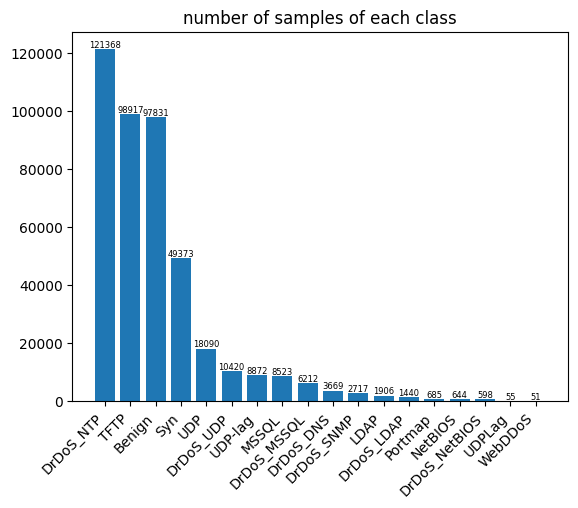

In [54]:
all_classes = ['DrDoS_NTP', 'TFTP', 'Benign', 'Syn', 'UDP', 'DrDoS_UDP', 'UDP-lag', 'MSSQL', 'DrDoS_MSSQL', 'DrDoS_DNS', 'DrDoS_SNMP', 'LDAP', 'DrDoS_LDAP', 'Portmap', 'NetBIOS', 'DrDoS_NetBIOS', 'UDPLag', 'WebDDoS']

fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all.Label.value_counts().unique())
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all.Label.value_counts().unique(), fontsize=6)
plt.show()

In [55]:
# creating a balanced portion of the dataset

maxSamples = 1000
balancedParts = []
for label, group in cic_ddos2019_all.groupby('Label'):
    if maxSamples <= len(group):
        sampled_DF = group.sample(n=maxSamples)
    else:
        sampled_DF = group
    balancedParts.append(sampled_DF)
cic_ddos2019_all_balanced = pd.concat(balancedParts, ignore_index=True)

print(cic_ddos2019_all_balanced.shape)

(15033, 78)


In [ ]:
# visualizing the balanced dataset
balanced_dataset = cic_ddos2019_all_balanced.to_numpy()
features = balanced_dataset[:,:-1]
classes = balanced_dataset[:,-1]

features_reduces = TSNE(n_components=2).fit_transform(features)    # takes 1min30 for 15k samples


In [ ]:
print(classes)

labelMap = {'DrDoS_NTP':0, 'TFTP':1, 'Benign':2, 'Syn':3, 'UDP':4, 'DrDoS_UDP':5, 'UDP-lag':6, 'MSSQL':7, 'DrDoS_MSSQL':8, 'DrDoS_DNS':9, 'DrDoS_SNMP':10, 'LDAP':11, 'DrDoS_LDAP':12, 'Portmap':13, 'NetBIOS':14, 'DrDoS_NetBIOS':15, 'UDPLag':16, 'WebDDoS':16}
classes_mapped = [labelMap[label] for label in classes]

print(classes_mapped)

['Benign' 'Benign' 'Benign' ... 'WebDDoS' 'WebDDoS' 'WebDDoS']
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

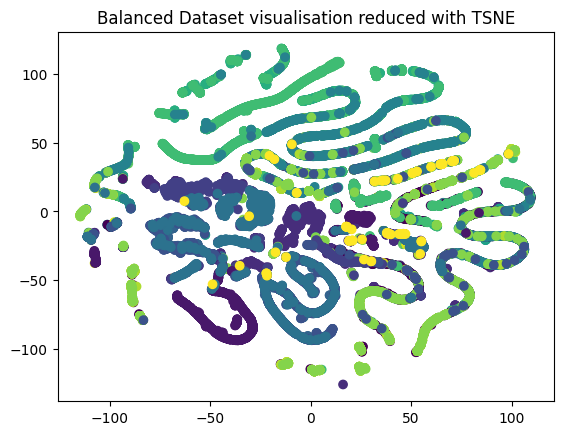

In [86]:
fig, ax = plt.subplots()
ax.scatter(features_reduces[:,0], features_reduces[:,1], c=classes_mapped, label=classes)
ax.set_title('Balanced Dataset visualisation reduced with TSNE')
plt.show()

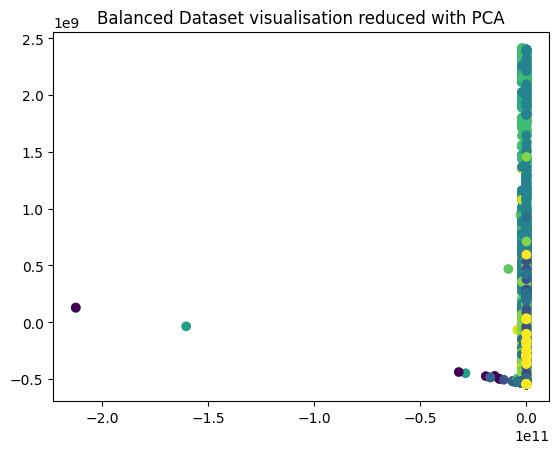

In [88]:
features_reduced_PCA = PCA(n_components=2).fit_transform(features)   # instantly
fig, ax = plt.subplots()
ax.scatter(features_reduced_PCA[:,0], features_reduced_PCA[:,1], c=classes_mapped)
ax.set_title('Balanced Dataset visualisation reduced with PCA')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

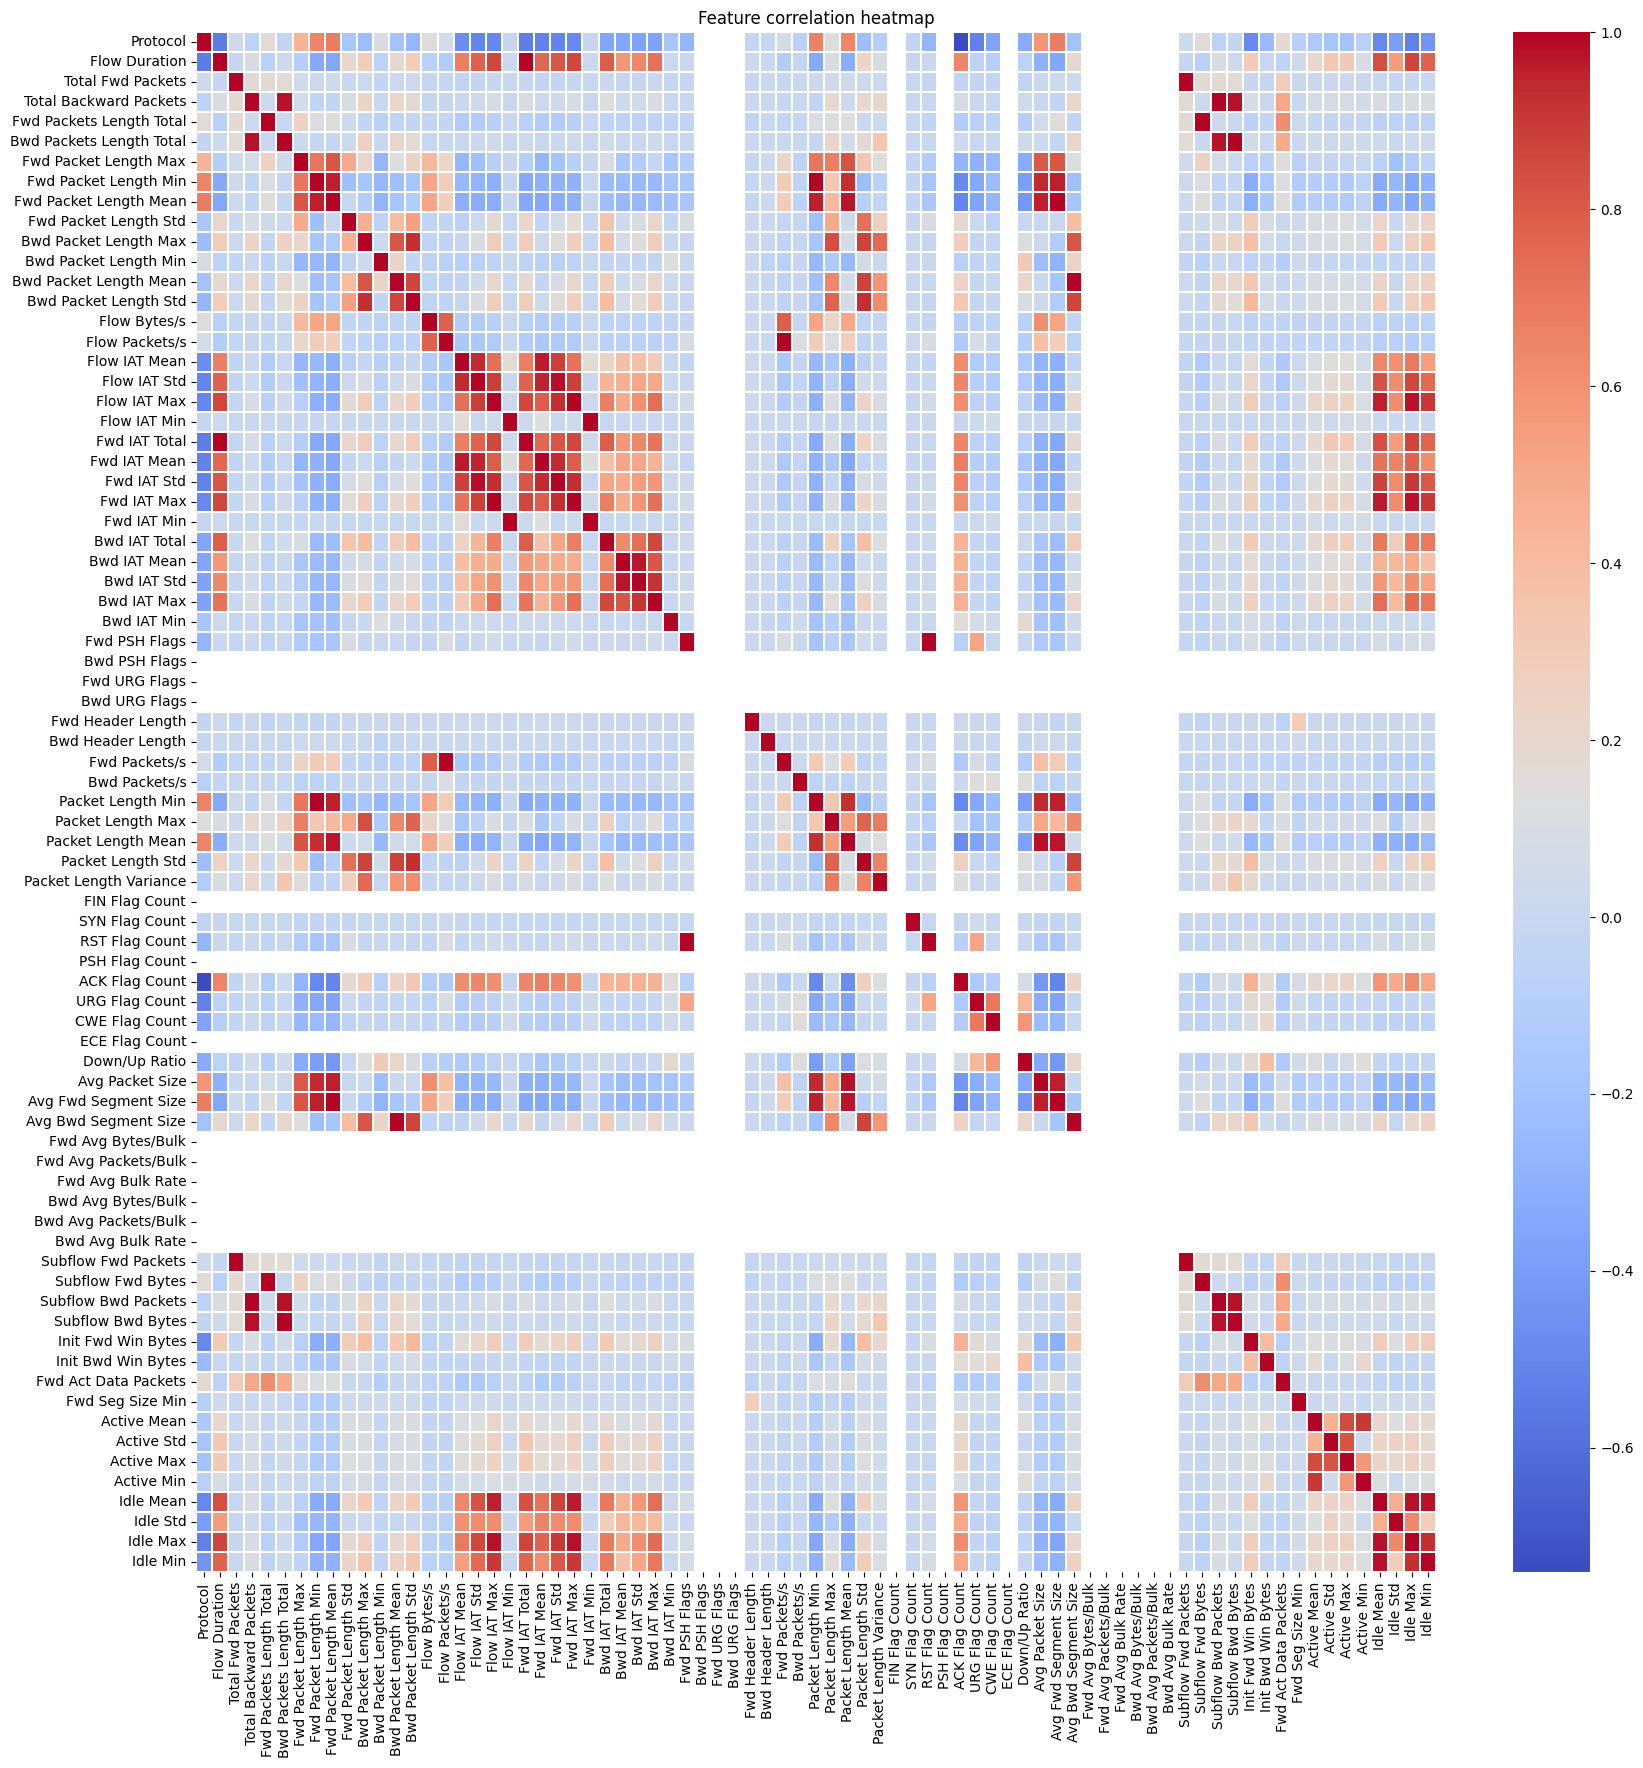

In [ ]:
# visualisation of the whole dataset
# cic_ddos2019_all_ndarray = cic_ddos2019_all.to_numpy()
# print(cic_ddos2019_all_ndarray.shape)

# feature_vectors = np.array(cic_ddos2019_all_ndarray[:,:-1])
# classes = np.array(cic_ddos2019_all_ndarray[:,-1])

correlation = cic_ddos2019_all.iloc[:,:-1].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.1)
plt.title('Feature correlation heatmap')
plt.show


# takes too much time (impossible)
# X_TSNE = TSNE(n_components=2).fit_transform(feature_vectors)
# X_PCA = PCA(n_components=2).fit_transform(feature_vectors)

In [ ]:
# merge all datasets in cic_ddos2019 into one WITH ADDED LABEL
cic_ddos2019_merged['DNS']['Attack'] = 'DNS'
cic_ddos2019_merged['LDAP']['Attack'] = 'LDAP'
cic_ddos2019_merged['MSSQL']['Attack'] = 'MSSQL'
cic_ddos2019_merged['NetBIOS']['Attack'] = 'NetBIOS'
cic_ddos2019_merged['Portmap']['Attack'] = 'Portmap'
cic_ddos2019_merged['SNMP']['Attack'] = 'SNMP'
cic_ddos2019_merged['Syn']['Attack'] = 'Syn'
cic_ddos2019_merged['TFTP']['Attack'] = 'TFTP'
cic_ddos2019_merged['UDPLag']['Attack'] = 'UDPLag'
cic_ddos2019_merged['UDP']['Attack'] = 'UDP'

cic_ddos2019_all_seperated = pd.concat(cic_ddos2019.values(), ignore_index=True)

print(cic_ddos2019_all_seperated.Label.value_counts())
print(cic_ddos2019_all_seperated.Attack.value_counts())

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64
Attack
TFTP       121833
DNS          6703
Portmap      5105
SNMP         4018
Name: count, dtype: int64
